# Statistiques descriptives et Data Visualization

L'objectif des statistiques descriptives réside dans plusieurs points :

- Apporter de la connaissance sur les données
- Explorer les différentes interactions entre les variables
- Détecter les observations anormales et aberrantes

La principale différence entre les statistiques descriptives et la Data Visualization est que cette dernière cherche à représenter de manière simple un phénomène complexe provenant des données.

## Hypothèses

- les 2 apart de 16 lits sont supprimés

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import ipyleaflet #pour faire de map

from bokeh.io import output_file, show #interactive 
from bokeh.palettes import Category20c
from bokeh.plotting import figure

from ipywidgets.embed import embed_minimal_html

sns.set(rc={'figure.figsize':(12,5)}) #set figure size form the start

# Config VS Code :
# npm install vscode-nls
# Installer l'extension HTML Preview
# Installer ipyleaflet

In [3]:
listings = pd.read_csv("listings.csv")
listings.head()

,listing_id,amenity_ids,bathrooms,bedrooms,beds,is_business_travel_ready,is_fully_refundable,is_host_highly_rated,is_new_listing,is_rebookable,latitude,longitude,person_capacity,type,weekly_factor,monthly_factor
0,28581061,"[33, 4, 21, 8, 40]",2.0,1.0,1.0,False,True,False,True,False,48.869292,2.348335,1,private_room,1.00,1.00
1,661961,"[2, 3, 131, 4, 8, 40, 104, 41, 43, 12, 45, 77,...",1.0,1.0,1.0,False,True,True,False,False,48.867284,2.403255,2,entire_home,0.88,0.69
2,1261705,"[33, 34, 35, 4, 8, 40, 45, 30, 46]",1.0,1.0,1.0,False,True,True,False,False,48.867894,2.375897,1,private_room,1.00,1.00
3,1318834,"[1, 33, 2, 3, 4, 8, 30, 31]",1.0,2.0,2.0,False,True,False,False,False,48.870370,2.358510,3,entire_home,0.82,0.48
4,1677091,"[33, 129, 35, 4, 103, 8, 40, 10, 11, 77, 46, 4...",1.0,1.0,1.0,False,True,True,False,False,48.874149,2.373700,2,entire_home,0.95,0.90


## Dénombrements

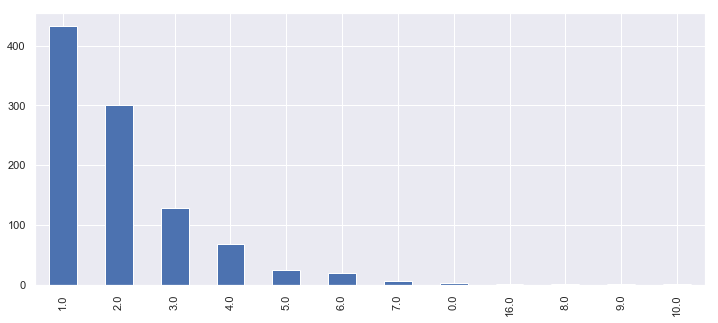

In [4]:
listings['beds'].value_counts().plot.bar()

In [5]:
listings.loc[listings['beds']==16]

,listing_id,amenity_ids,bathrooms,bedrooms,beds,is_business_travel_ready,is_fully_refundable,is_host_highly_rated,is_new_listing,is_rebookable,latitude,longitude,person_capacity,type,weekly_factor,monthly_factor
559,18691947,"[4, 40, 11, 44, 45, 46, 49, 50, 21, 89, 90, 91...",1.0,1.0,16.0,False,True,True,False,False,48.866076,2.382308,1,shared_room,0.9,1.0
564,18691419,"[49, 50, 4, 21, 40, 89, 90, 91, 44, 45, 46]",1.0,1.0,16.0,False,True,True,False,False,48.867191,2.381685,1,shared_room,0.9,1.0


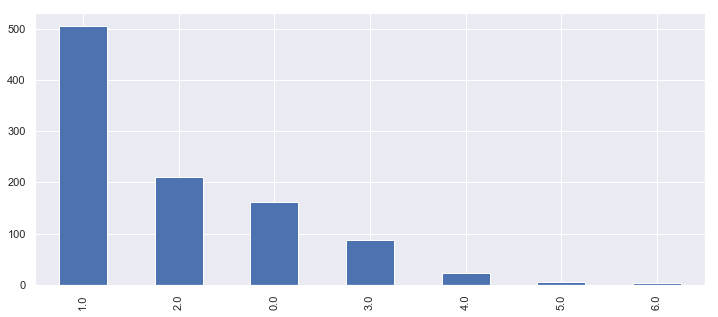

In [6]:
listings['bedrooms'].value_counts().plot.bar()

In [7]:
listings.loc[listings['bedrooms']==0]['type'].value_counts()

entire_home     157
private_room      4
Name: type, dtype: int64

In [8]:
listings.loc[(listings['bedrooms']==0)&(listings['type']=='private_room')]

,listing_id,amenity_ids,bathrooms,bedrooms,beds,is_business_travel_ready,is_fully_refundable,is_host_highly_rated,is_new_listing,is_rebookable,latitude,longitude,person_capacity,type,weekly_factor,monthly_factor
212,3562428,"[32, 1, 3, 35, 4, 37, 39, 8, 10, 51, 55, 30, 31]",0.0,0.0,1.0,False,True,False,False,False,48.864651,2.363825,1,private_room,0.80,0.60
276,6521400,"[1, 33, 3, 35, 4, 8, 40, 41, 44, 45, 46, 47, 3...",1.0,0.0,2.0,False,True,False,False,False,48.868658,2.352798,3,private_room,0.99,0.98
696,21905043,"[16, 32, 35, 4, 5, 38, 39, 8, 30, 47]",1.0,0.0,1.0,False,True,False,False,False,48.860665,2.366999,10,private_room,1.00,1.00
826,25145168,"[1, 2, 4, 8, 77, 85, 86, 89, 90, 27, 91, 92, 9...",1.0,0.0,2.0,False,True,False,False,False,48.862173,2.358193,4,private_room,1.00,1.00


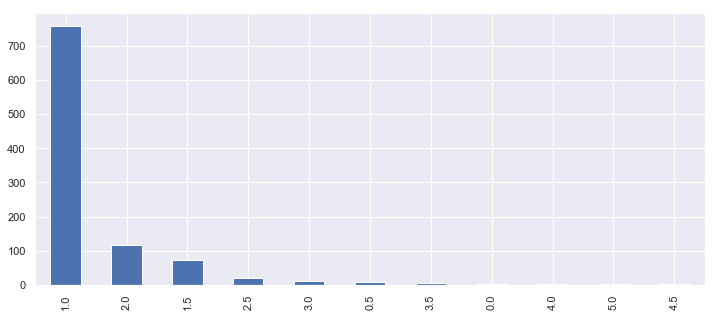

In [9]:
listings['bathrooms'].value_counts().plot.bar()

## Interactions

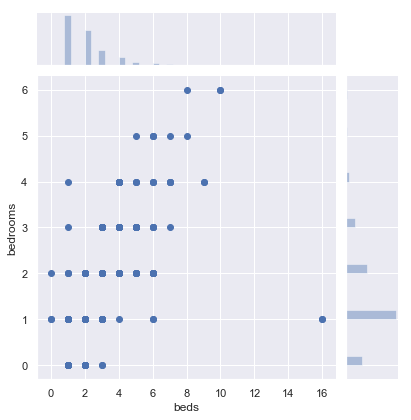

In [10]:
sns.jointplot(x='beds', y='bedrooms', data=listings)

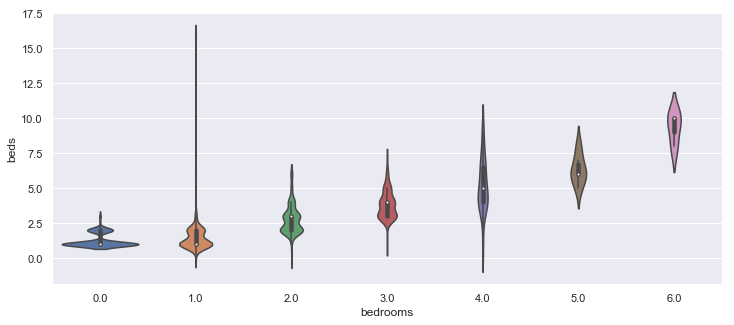

In [11]:
sns.violinplot(x='bedrooms', y='beds', data=listings)

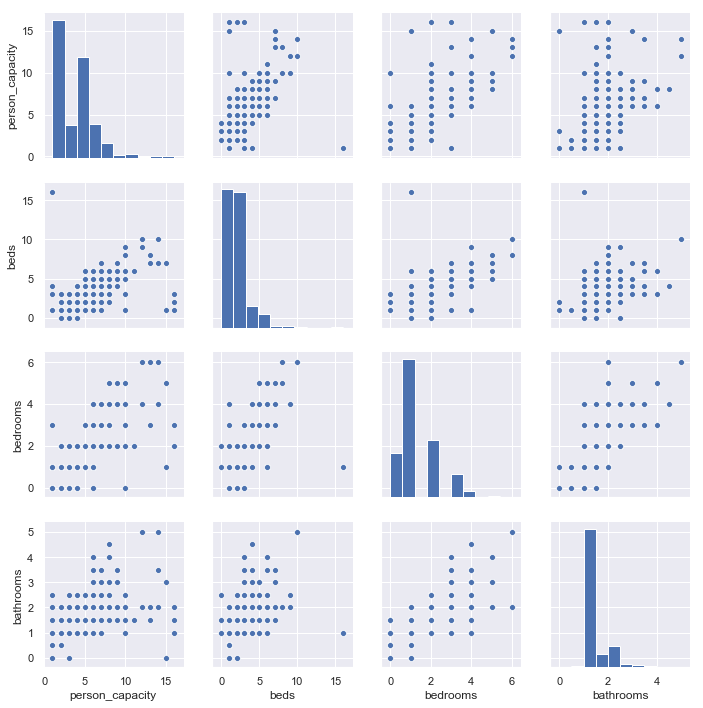

In [14]:
sns.pairplot(listings[["person_capacity", "beds", "bedrooms", "bathrooms"]])

## Carte

In [13]:
from ipyleaflet import Map, Heatmap, basemaps, basemap_to_tiles, Circle

# Choisissez votre couche graphique : https://leaflet-extras.github.io/leaflet-providers/preview/
m = Map(center=(48.86, 2.35), zoom=12, layers=(basemap_to_tiles(basemaps.CartoDB.Positron, "2017-04-08"),))

coords = listings[['person_capacity','latitude', 'longitude']]

# Coder la fonction add_circle qui ajoute un point sur la carte pour chaque appartement
def add_circle(row):
    circle=Circle()
    circle.location=(row['latitude'],row['longitude'])
    circle.radius=1
    if row['person_capacity']==1:
        circle.color='black'
        m.add_layer(circle)
    else:
        if (row['person_capacity']==2) or (row['person_capacity']==3):
            circle.color='blue'
            m.add_layer(circle)
        else:
            if (row['person_capacity']==4) or (row['person_capacity']==5) or (row['person_capacity']==6):
                circle.color='orange'
                m.add_layer(circle)
            else:
                circle.color='red'
                m.add_layer(circle)



# TODO : Appliquer la fonction sur tout le jeu de données
coords.apply(add_circle,axis=1)


embed_minimal_html('map.html', views=[m], title='Carte des appartements')
m

Map(center=[48.86, 2.35], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_ou…